In [1]:
import warnings
warnings.filterwarnings('ignore')

# Library for EDA & Visualisasi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
style.use('fivethirtyeight')

# Library Preprocessing
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn import over_sampling

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
coba.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,arrived_late
107,108,F,Ship,4,5,216,3,high,M,26,2053,1
5594,5595,A,Road,3,1,220,3,low,F,6,5572,1
6997,6998,F,Flight,3,2,215,4,low,F,3,4042,0
3984,3985,D,Flight,5,1,160,5,low,F,1,4672,0
3111,3112,B,Ship,5,4,229,2,medium,F,44,2419,1


In [4]:
coba2 = coba.drop('ID', axis = 1)

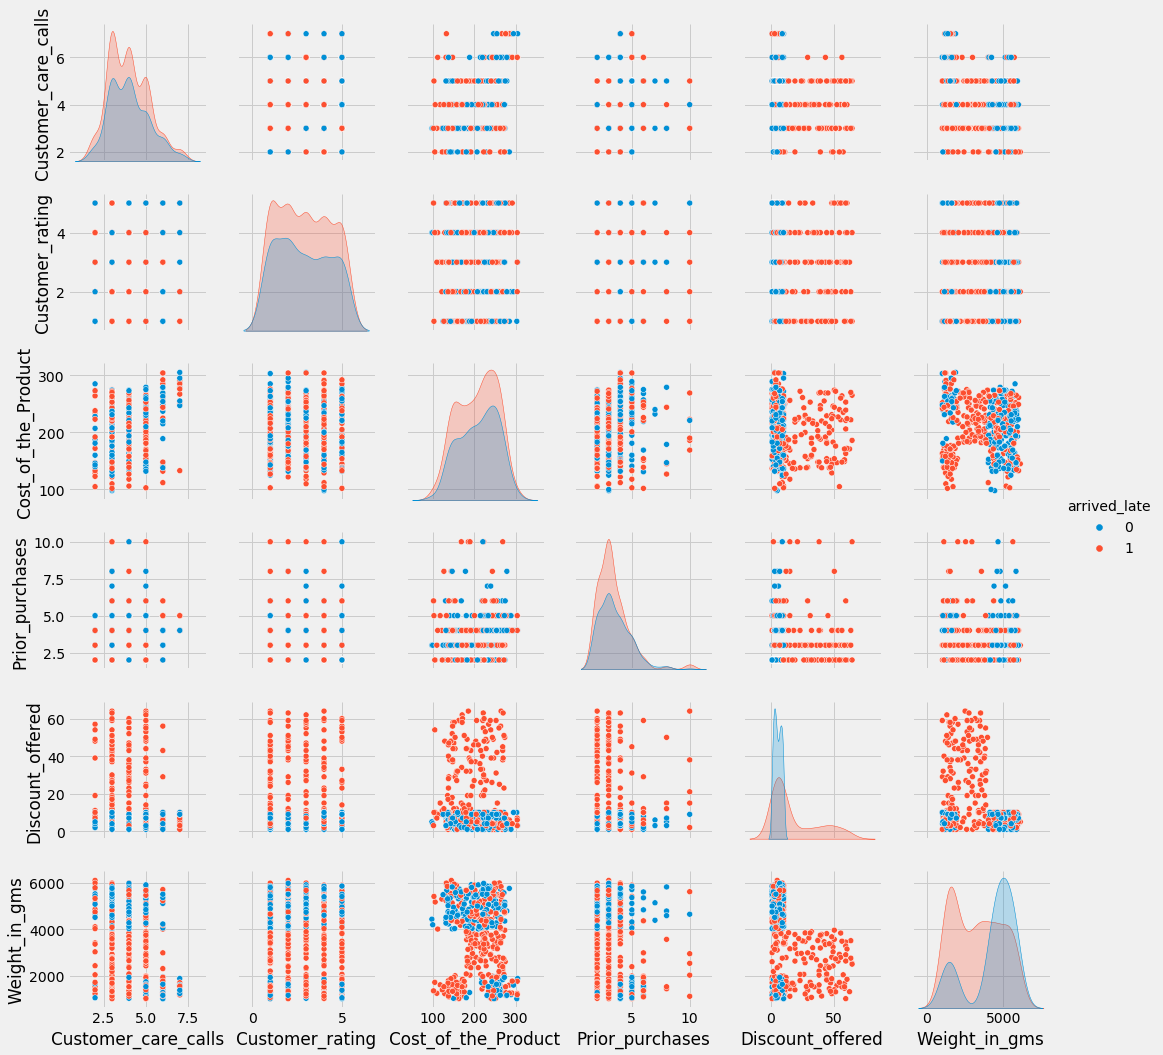

In [5]:
sns.pairplot(data = coba2, hue = 'arrived_late')

In [19]:
filter1 = df['Weight_in_gms'] < 2000
filter2 = df['Cost_of_the_Product'] < 180

coba3 = df[filter1 & filter2]
coba3.arrived_late.value_counts()

1    1283
0      42
Name: arrived_late, dtype: int64

In [18]:
filter1 = df['Prior_purchases'] < 4
filter2 = df['Weight_in_gms'] < 4000

coba3 = df[filter1 & filter2]
coba3.arrived_late.value_counts()

1    2327
0      41
Name: arrived_late, dtype: int64

In [20]:
filter1 = df['Customer_care_calls'] == 3
filter2 = df['Weight_in_gms'] < 4000

coba3 = df[filter1 & filter2]
coba3.arrived_late.value_counts()

1    1138
0      28
Name: arrived_late, dtype: int64

## EDA Discount Under 10%, weight > 4 kg

In [23]:
disc = df[(df['Discount_offered'] <= 10) & (df['Weight_in_gms'] > 4000)]
disc.drop('ID', axis = 1, inplace = True)
sd = disc.sample(500, random_state = 1412)

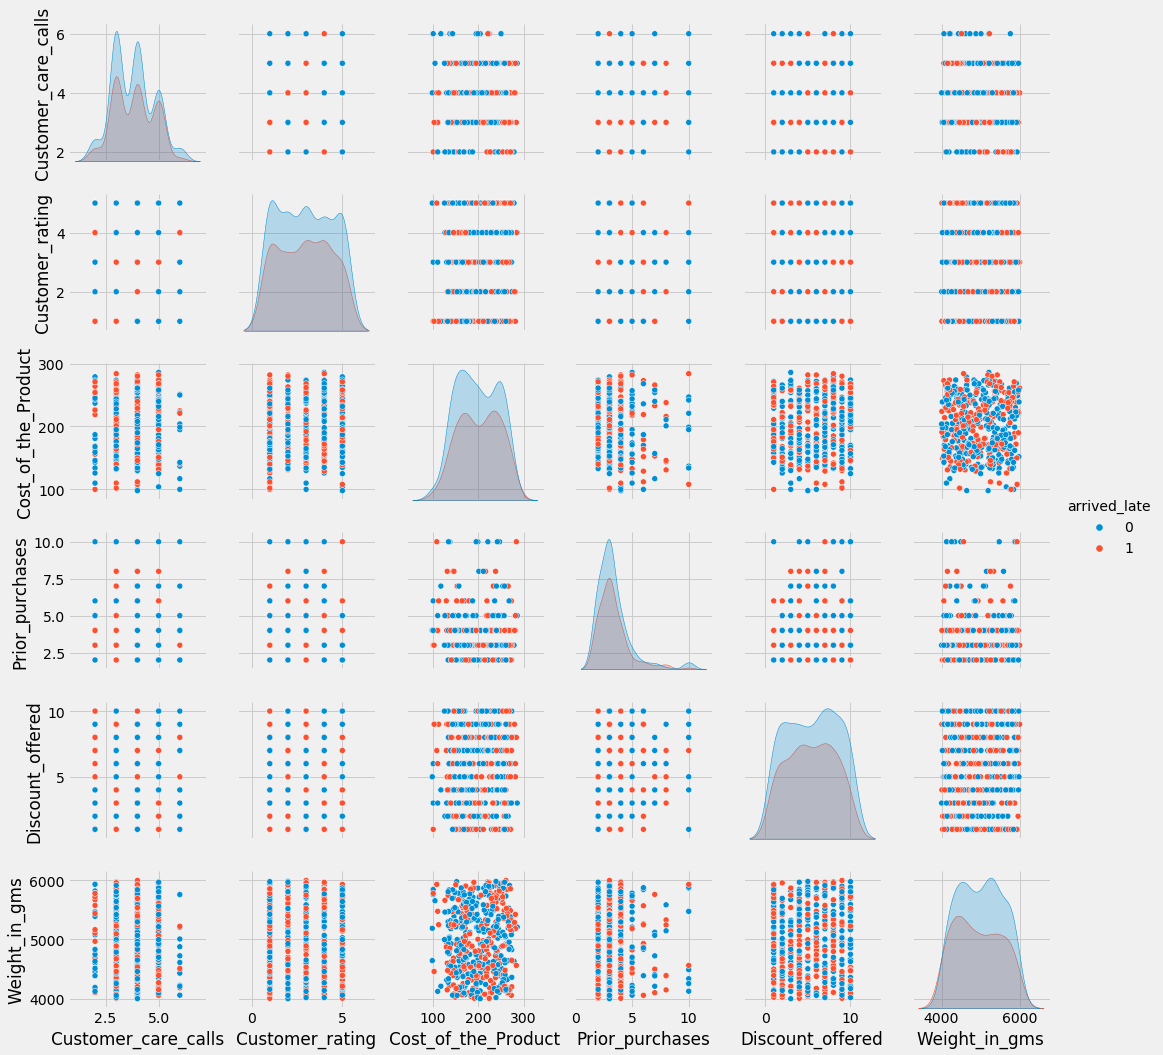

In [24]:
sns.pairplot(data = sd, hue = 'arrived_late')

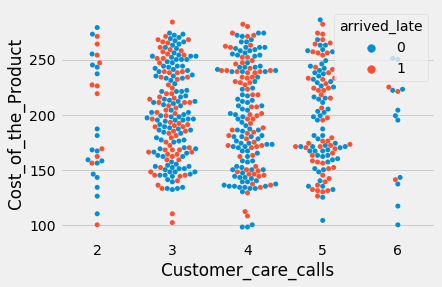

In [25]:
sns.swarmplot(data = sd, x = 'Customer_care_calls', y = 'Cost_of_the_Product', hue = 'arrived_late')